In [2]:
import keras
from keras import layers, losses, optimizers, models
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

Loading and Normalizing dataset

In [3]:
(x_train, ytrain), (x_test, ytest) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
x_train, x_test = x_train.reshape(-1,784), x_test.reshape(-1,784)
y_train, y_test = keras.utils.to_categorical(ytrain, num_classes=10), keras.utils.to_categorical(ytest, num_classes=10)

x_train.shape, x_test.shape, y_test.shape, y_train.shape

((60000, 784), (10000, 784), (10000, 10), (60000, 10))

# **Part 1**

In [18]:
MLP_model = models.Sequential()
MLP_model.add(layers.Dense(512, input_shape = (x_train[0].shape), activation='relu'))
MLP_model.add(layers.Dropout(0.5))
MLP_model.add(layers.Dense(64, activation = 'relu'))
MLP_model.add(layers.Dense(10, activation='softmax'))

MLP_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 435,402
Trainable params: 435,402
Non-trainable params: 0
_________________________________________________________________


In [19]:
MLP_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = MLP_model.fit(x_train, y_train, epochs=25, batch_size=256, validation_data=(x_test,y_test))

Epoch 1/25
235/235 [==============================] - 4s 17ms/step - loss: 0.6634 - accuracy: 0.7965 - val_loss: 0.1498 - val_accuracy: 0.9554
Epoch 2/25
235/235 [==============================] - 4s 17ms/step - loss: 0.1754 - accuracy: 0.9478 - val_loss: 0.1075 - val_accuracy: 0.9675
Epoch 3/25
235/235 [==============================] - 4s 17ms/step - loss: 0.1277 - accuracy: 0.9615 - val_loss: 0.0876 - val_accuracy: 0.9728
Epoch 4/25
235/235 [==============================] - 4s 17ms/step - loss: 0.1007 - accuracy: 0.9692 - val_loss: 0.0756 - val_accuracy: 0.9767
Epoch 5/25
235/235 [==============================] - 4s 17ms/step - loss: 0.0882 - accuracy: 0.9725 - val_loss: 0.0753 - val_accuracy: 0.9753
Epoch 6/25
235/235 [==============================] - 4s 17ms/step - loss: 0.0744 - accuracy: 0.9764 - val_loss: 0.0663 - val_accuracy: 0.9799
Epoch 7/25
235/235 [==============================] - 4s 16ms/step - loss: 0.0668 - accuracy: 0.9793 - val_loss: 0.0621 - val_accuracy: 0.9790

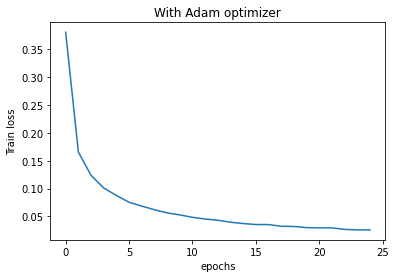

In [25]:
plt.plot(history.history['loss'])
plt.title('With Adam optimizer')
plt.ylabel('Train loss')
plt.xlabel('epochs')

plt.show()

In [28]:
print("Test Accuracy = ",history.history['val_accuracy'][-1])

Test Accuracy =  0.9851999878883362


## **Experimenting with other optimizers**

### RMSProp

In [20]:
MLP_model_rms = models.Sequential()
MLP_model_rms.add(layers.Dense(512, input_shape = (x_train[0].shape), activation='relu'))
MLP_model_rms.add(layers.Dropout(0.5))
MLP_model_rms.add(layers.Dense(64, activation = 'relu'))
MLP_model_rms.add(layers.Dense(10, activation='softmax'))

MLP_model_rms.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

history_rms = MLP_model_rms.fit(x_train, y_train, epochs=20, batch_size=256, validation_data=(x_test,y_test))

Epoch 1/20
235/235 [==============================] - 5s 20ms/step - loss: 0.6338 - accuracy: 0.8042 - val_loss: 0.1588 - val_accuracy: 0.9509
Epoch 2/20
235/235 [==============================] - 4s 19ms/step - loss: 0.1772 - accuracy: 0.9455 - val_loss: 0.1077 - val_accuracy: 0.9671
Epoch 3/20
235/235 [==============================] - 5s 19ms/step - loss: 0.1280 - accuracy: 0.9607 - val_loss: 0.0899 - val_accuracy: 0.9713
Epoch 4/20
235/235 [==============================] - 5s 20ms/step - loss: 0.1025 - accuracy: 0.9681 - val_loss: 0.0815 - val_accuracy: 0.9754
Epoch 5/20
235/235 [==============================] - 5s 19ms/step - loss: 0.0830 - accuracy: 0.9740 - val_loss: 0.0713 - val_accuracy: 0.9779
Epoch 6/20
235/235 [==============================] - 4s 19ms/step - loss: 0.0759 - accuracy: 0.9763 - val_loss: 0.0719 - val_accuracy: 0.9780
Epoch 7/20
235/235 [==============================] - 4s 19ms/step - loss: 0.0695 - accuracy: 0.9784 - val_loss: 0.0647 - val_accuracy: 0.9817

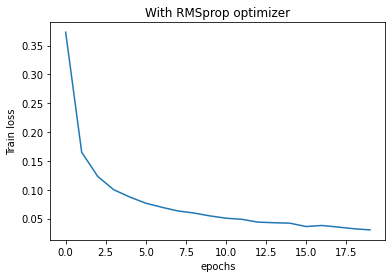

In [26]:
plt.plot(history_rms.history['loss'])
plt.title('With RMSprop optimizer')
plt.ylabel('Train loss')
plt.xlabel('epochs')

plt.show()

In [29]:
print("Test Accuracy = ",history_rms.history['val_accuracy'][-1])

Test Accuracy =  0.9850000143051147


### SGD with momentum

In [30]:
MLP_model_SGDm = models.Sequential()
MLP_model_SGDm.add(layers.Dense(512, input_shape = (x_train[0].shape), activation='relu'))
MLP_model_SGDm.add(layers.Dropout(0.5))
MLP_model_SGDm.add(layers.Dense(64, activation = 'relu'))
MLP_model_SGDm.add(layers.Dense(10, activation='softmax'))

opt = optimizers.SGD(momentum=0.9)
MLP_model_SGDm.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history_SGDm = MLP_model_SGDm.fit(x_train, y_train, epochs=20, batch_size=256, validation_data=(x_test,y_test))

Epoch 1/20
235/235 [==============================] - 5s 19ms/step - loss: 1.1849 - accuracy: 0.6288 - val_loss: 0.2897 - val_accuracy: 0.9178
Epoch 2/20
235/235 [==============================] - 4s 18ms/step - loss: 0.3502 - accuracy: 0.8972 - val_loss: 0.2140 - val_accuracy: 0.9401
Epoch 3/20
235/235 [==============================] - 4s 18ms/step - loss: 0.2534 - accuracy: 0.9264 - val_loss: 0.1768 - val_accuracy: 0.9479
Epoch 4/20
235/235 [==============================] - 4s 17ms/step - loss: 0.2194 - accuracy: 0.9363 - val_loss: 0.1536 - val_accuracy: 0.9546
Epoch 5/20
235/235 [==============================] - 4s 18ms/step - loss: 0.1919 - accuracy: 0.9437 - val_loss: 0.1348 - val_accuracy: 0.9597
Epoch 6/20
235/235 [==============================] - 4s 19ms/step - loss: 0.1631 - accuracy: 0.9526 - val_loss: 0.1210 - val_accuracy: 0.9648
Epoch 7/20
235/235 [==============================] - 5s 20ms/step - loss: 0.1479 - accuracy: 0.9557 - val_loss: 0.1098 - val_accuracy: 0.9668

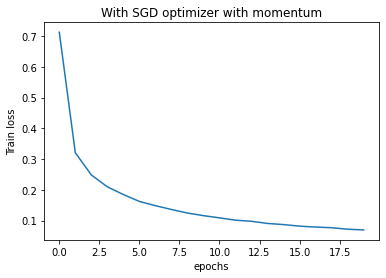

In [31]:
plt.plot(history_SGDm.history['loss'])
plt.title('With SGD optimizer with momentum')
plt.ylabel('Train loss')
plt.xlabel('epochs')

plt.show()

In [32]:
print("Test Accuracy = ",history_SGDm.history['val_accuracy'][-1])

Test Accuracy =  0.9787999987602234


### SGD without momentum

In [33]:
MLP_model_SGD = models.Sequential()
MLP_model_SGD.add(layers.Dense(512, input_shape = (x_train[0].shape), activation='relu'))
MLP_model_SGD.add(layers.Dropout(0.5))
MLP_model_SGD.add(layers.Dense(64, activation = 'relu'))
MLP_model_SGD.add(layers.Dense(10, activation='softmax'))

opt = optimizers.SGD()
MLP_model_SGD.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history_SGD = MLP_model_SGD.fit(x_train, y_train, epochs=20, batch_size=256, validation_data=(x_test,y_test))

Epoch 1/20
235/235 [==============================] - 5s 18ms/step - loss: 2.0593 - accuracy: 0.2985 - val_loss: 1.0080 - val_accuracy: 0.8080
Epoch 2/20
235/235 [==============================] - 4s 16ms/step - loss: 1.0127 - accuracy: 0.7356 - val_loss: 0.5576 - val_accuracy: 0.8715
Epoch 3/20
235/235 [==============================] - 4s 17ms/step - loss: 0.6731 - accuracy: 0.8070 - val_loss: 0.4358 - val_accuracy: 0.8890
Epoch 4/20
235/235 [==============================] - 4s 17ms/step - loss: 0.5486 - accuracy: 0.8410 - val_loss: 0.3795 - val_accuracy: 0.8991
Epoch 5/20
235/235 [==============================] - 4s 17ms/step - loss: 0.4840 - accuracy: 0.8589 - val_loss: 0.3454 - val_accuracy: 0.9057
Epoch 6/20
235/235 [==============================] - 4s 17ms/step - loss: 0.4536 - accuracy: 0.8672 - val_loss: 0.3215 - val_accuracy: 0.9105
Epoch 7/20
235/235 [==============================] - 4s 17ms/step - loss: 0.4129 - accuracy: 0.8802 - val_loss: 0.3046 - val_accuracy: 0.9147

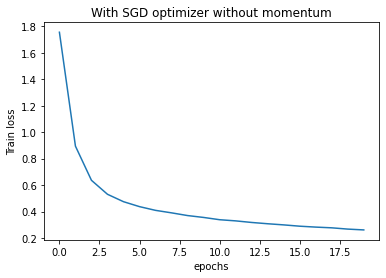

In [34]:
plt.plot(history_SGD.history['loss'])
plt.title('With SGD optimizer without momentum')
plt.ylabel('Train loss')
plt.xlabel('epochs')

plt.show()

In [35]:
print("Test Accuracy = ",history_SGD.history['val_accuracy'][-1])

Test Accuracy =  0.9409999847412109


## **Experimenting with variuos weight initializations**

### Xavier normal (GlorotNormal)

In [9]:
MLP_model_XN = models.Sequential()
MLP_model_XN.add(layers.Dense(512, input_shape = (x_train[0].shape), activation='relu', kernel_initializer=keras.initializers.GlorotNormal()))
MLP_model_XN.add(layers.Dropout(0.5))
MLP_model_XN.add(layers.Dense(64, activation = 'relu', kernel_initializer=keras.initializers.GlorotNormal()))
MLP_model_XN.add(layers.Dense(10, activation='softmax', kernel_initializer=keras.initializers.GlorotNormal()))

MLP_model_XN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_XN = MLP_model_XN.fit(x_train, y_train, epochs=22, batch_size=256, validation_data=(x_test,y_test))

Epoch 1/22
235/235 [==============================] - 4s 16ms/step - loss: 0.6889 - accuracy: 0.7890 - val_loss: 0.1499 - val_accuracy: 0.9548
Epoch 2/22
235/235 [==============================] - 4s 15ms/step - loss: 0.1795 - accuracy: 0.9472 - val_loss: 0.1059 - val_accuracy: 0.9674
Epoch 3/22
235/235 [==============================] - 4s 15ms/step - loss: 0.1279 - accuracy: 0.9611 - val_loss: 0.0849 - val_accuracy: 0.9731
Epoch 4/22
235/235 [==============================] - 4s 15ms/step - loss: 0.0995 - accuracy: 0.9690 - val_loss: 0.0764 - val_accuracy: 0.9766
Epoch 5/22
235/235 [==============================] - 4s 16ms/step - loss: 0.0866 - accuracy: 0.9731 - val_loss: 0.0664 - val_accuracy: 0.9782
Epoch 6/22
235/235 [==============================] - 4s 15ms/step - loss: 0.0735 - accuracy: 0.9772 - val_loss: 0.0668 - val_accuracy: 0.9792
Epoch 7/22
235/235 [==============================] - 4s 16ms/step - loss: 0.0639 - accuracy: 0.9793 - val_loss: 0.0648 - val_accuracy: 0.9800

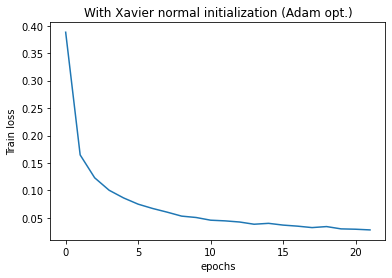

In [37]:
plt.plot(history_XN.history['loss'])
plt.title('With Xavier normal initialization (Adam opt.)')
plt.ylabel('Train loss')
plt.xlabel('epochs')

plt.show()

In [38]:
print("Test Accuracy = ",history_XN.history['val_accuracy'][-1])

Test Accuracy =  0.9854999780654907


###Xavier Uniform (GlorotUniform)

In [39]:
MLP_model_XU = models.Sequential()
MLP_model_XU.add(layers.Dense(512, input_shape = (x_train[0].shape), activation='relu', kernel_initializer=keras.initializers.GlorotUniform()))
MLP_model_XU.add(layers.Dropout(0.5))
MLP_model_XU.add(layers.Dense(64, activation = 'relu', kernel_initializer=keras.initializers.GlorotUniform()))
MLP_model_XU.add(layers.Dense(10, activation='softmax', kernel_initializer=keras.initializers.GlorotUniform()))

MLP_model_XU.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_XU = MLP_model_XU.fit(x_train, y_train, epochs=22, batch_size=256, validation_data=(x_test,y_test))

Epoch 1/22
235/235 [==============================] - 5s 19ms/step - loss: 0.6748 - accuracy: 0.7918 - val_loss: 0.1527 - val_accuracy: 0.9535
Epoch 2/22
235/235 [==============================] - 4s 18ms/step - loss: 0.1747 - accuracy: 0.9481 - val_loss: 0.1058 - val_accuracy: 0.9670
Epoch 3/22
235/235 [==============================] - 4s 19ms/step - loss: 0.1275 - accuracy: 0.9618 - val_loss: 0.0856 - val_accuracy: 0.9740
Epoch 4/22
235/235 [==============================] - 4s 18ms/step - loss: 0.0994 - accuracy: 0.9701 - val_loss: 0.0767 - val_accuracy: 0.9760
Epoch 5/22
235/235 [==============================] - 4s 19ms/step - loss: 0.0887 - accuracy: 0.9732 - val_loss: 0.0773 - val_accuracy: 0.9758
Epoch 6/22
235/235 [==============================] - 4s 19ms/step - loss: 0.0724 - accuracy: 0.9770 - val_loss: 0.0664 - val_accuracy: 0.9788
Epoch 7/22
235/235 [==============================] - 4s 19ms/step - loss: 0.0636 - accuracy: 0.9795 - val_loss: 0.0652 - val_accuracy: 0.9792

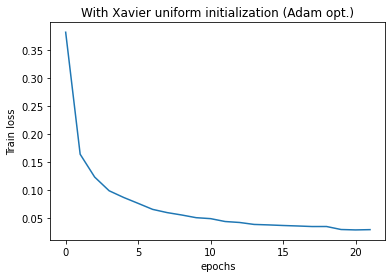

In [40]:
plt.plot(history_XU.history['loss'])
plt.title('With Xavier uniform initialization (Adam opt.)')
plt.ylabel('Train loss')
plt.xlabel('epochs')

plt.show()

In [41]:
print("Test Accuracy = ",history_XU.history['val_accuracy'][-1])

Test Accuracy =  0.9829999804496765


## **Experimenting with different Learning rates**

### Learning rate = 0.0001 (Might be Too Low)

In [45]:
MLP_model_l1 = models.Sequential()
MLP_model_l1.add(layers.Dense(512, input_shape = (x_train[0].shape), activation='relu'))
MLP_model_l1.add(layers.Dropout(0.5))
MLP_model_l1.add(layers.Dense(64, activation = 'relu'))
MLP_model_l1.add(layers.Dense(10, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.0001)
MLP_model_l1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history_l1 = MLP_model_l1.fit(x_train, y_train, epochs=20, batch_size=256, validation_data=(x_test,y_test))

Epoch 1/20
235/235 [==============================] - 5s 18ms/step - loss: 1.5562 - accuracy: 0.5261 - val_loss: 0.3998 - val_accuracy: 0.8960
Epoch 2/20
235/235 [==============================] - 4s 16ms/step - loss: 0.4644 - accuracy: 0.8655 - val_loss: 0.2849 - val_accuracy: 0.9210
Epoch 3/20
235/235 [==============================] - 4s 16ms/step - loss: 0.3434 - accuracy: 0.9007 - val_loss: 0.2386 - val_accuracy: 0.9338
Epoch 4/20
235/235 [==============================] - 4s 17ms/step - loss: 0.2870 - accuracy: 0.9186 - val_loss: 0.2064 - val_accuracy: 0.9407
Epoch 5/20
235/235 [==============================] - 4s 16ms/step - loss: 0.2567 - accuracy: 0.9254 - val_loss: 0.1858 - val_accuracy: 0.9452
Epoch 6/20
235/235 [==============================] - 4s 16ms/step - loss: 0.2205 - accuracy: 0.9364 - val_loss: 0.1671 - val_accuracy: 0.9501
Epoch 7/20
235/235 [==============================] - 4s 16ms/step - loss: 0.2032 - accuracy: 0.9406 - val_loss: 0.1540 - val_accuracy: 0.9547

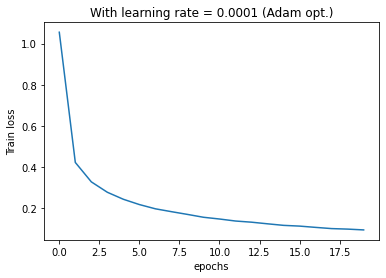

In [49]:
plt.plot(history_l1.history['loss'])
plt.title('With learning rate = 0.0001 (Adam opt.)')
plt.ylabel('Train loss')
plt.xlabel('epochs')

plt.show()

In [47]:
print("Test Accuracy = ",history_l1.history['val_accuracy'][-1])

Test Accuracy =  0.9746000170707703


### Learning rate = 0.999 (Might be too high)

In [48]:
MLP_model_l2 = models.Sequential()
MLP_model_l2.add(layers.Dense(512, input_shape = (x_train[0].shape), activation='relu'))
MLP_model_l2.add(layers.Dropout(0.5))
MLP_model_l2.add(layers.Dense(64, activation = 'relu'))
MLP_model_l2.add(layers.Dense(10, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.999)
MLP_model_l2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history_l2 = MLP_model_l2.fit(x_train, y_train, epochs=20, batch_size=256, validation_data=(x_test,y_test))

Epoch 1/20
235/235 [==============================] - 4s 17ms/step - loss: 3019.0841 - accuracy: 0.1052 - val_loss: 2.3420 - val_accuracy: 0.0958
Epoch 2/20
235/235 [==============================] - 4s 16ms/step - loss: 2.3355 - accuracy: 0.1028 - val_loss: 2.3377 - val_accuracy: 0.1028
Epoch 3/20
235/235 [==============================] - 4s 16ms/step - loss: 2.3325 - accuracy: 0.1047 - val_loss: 2.3320 - val_accuracy: 0.1009
Epoch 4/20
235/235 [==============================] - 4s 16ms/step - loss: 2.3697 - accuracy: 0.1011 - val_loss: 2.3247 - val_accuracy: 0.0980
Epoch 5/20
235/235 [==============================] - 4s 16ms/step - loss: 2.7589 - accuracy: 0.1022 - val_loss: 2.3116 - val_accuracy: 0.0892
Epoch 6/20
235/235 [==============================] - 4s 16ms/step - loss: 2.3505 - accuracy: 0.0989 - val_loss: 2.3526 - val_accuracy: 0.0958
Epoch 7/20
235/235 [==============================] - 4s 17ms/step - loss: 3.0338 - accuracy: 0.1019 - val_loss: 2.3292 - val_accuracy: 0.1

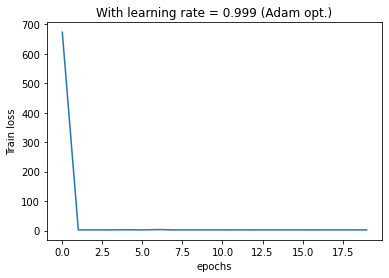

In [50]:
plt.plot(history_l2.history['loss'])
plt.title('With learning rate = 0.999 (Adam opt.)')
plt.ylabel('Train loss')
plt.xlabel('epochs')

plt.show()

In [51]:
print("Test Accuracy = ",history_l2.history['val_accuracy'][-1])

Test Accuracy =  0.10279999673366547


### Exponential annealing on learning rate

In [52]:
MLP_model_lexp = models.Sequential()
MLP_model_lexp.add(layers.Dense(512, input_shape = (x_train[0].shape), activation='relu'))
MLP_model_lexp.add(layers.Dropout(0.5))
MLP_model_lexp.add(layers.Dense(64, activation = 'relu'))
MLP_model_lexp.add(layers.Dense(10, activation='softmax'))

lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-2, decay_steps=10000, decay_rate=0.9)

opt = keras.optimizers.Adam(learning_rate=lr_schedule)
MLP_model_lexp.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history_lexp = MLP_model_lexp.fit(x_train, y_train, epochs=20, batch_size=256, validation_data=(x_test,y_test))

Epoch 1/20
235/235 [==============================] - 4s 17ms/step - loss: 0.6312 - accuracy: 0.8014 - val_loss: 0.1357 - val_accuracy: 0.9583
Epoch 2/20
235/235 [==============================] - 4s 16ms/step - loss: 0.2155 - accuracy: 0.9346 - val_loss: 0.1203 - val_accuracy: 0.9654
Epoch 3/20
235/235 [==============================] - 4s 17ms/step - loss: 0.1846 - accuracy: 0.9438 - val_loss: 0.1063 - val_accuracy: 0.9699
Epoch 4/20
235/235 [==============================] - 4s 17ms/step - loss: 0.1650 - accuracy: 0.9491 - val_loss: 0.0899 - val_accuracy: 0.9733
Epoch 5/20
235/235 [==============================] - 4s 16ms/step - loss: 0.1559 - accuracy: 0.9518 - val_loss: 0.1074 - val_accuracy: 0.9689
Epoch 6/20
235/235 [==============================] - 4s 16ms/step - loss: 0.1493 - accuracy: 0.9550 - val_loss: 0.0967 - val_accuracy: 0.9710
Epoch 7/20
235/235 [==============================] - 4s 16ms/step - loss: 0.1401 - accuracy: 0.9585 - val_loss: 0.1006 - val_accuracy: 0.9724

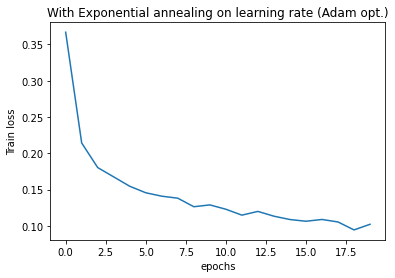

In [54]:
plt.plot(history_lexp.history['loss'])
plt.title('With Exponential annealing on learning rate (Adam opt.)')
plt.ylabel('Train loss')
plt.xlabel('epochs')

plt.show()

In [55]:
print("Test Accuracy = ",history_lexp.history['val_accuracy'][-1])

Test Accuracy =  0.9769999980926514


# **Part-2**

## **Building Autoencoder**

In [5]:
input = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input)
encoded = layers.Dense(32, activation='relu')(encoded)      # Bottleneck

decoded = layers.Dense(128, activation='relu')(encoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder_model = keras.Model(inputs=input, outputs=decoded)
autoencoder_model.compile(optimizer='adam', loss='binary_crossentropy')

history_enc = autoencoder_model.fit(x_train, x_train, epochs=25, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/25
235/235 [==============================] - 4s 16ms/step - loss: 0.3230 - val_loss: 0.1476
Epoch 2/25
235/235 [==============================] - 4s 15ms/step - loss: 0.1398 - val_loss: 0.1201
Epoch 3/25
235/235 [==============================] - 4s 15ms/step - loss: 0.1182 - val_loss: 0.1079
Epoch 4/25
235/235 [==============================] - 4s 15ms/step - loss: 0.1076 - val_loss: 0.1016
Epoch 5/25
235/235 [==============================] - 4s 15ms/step - loss: 0.1023 - val_loss: 0.0982
Epoch 6/25
235/235 [==============================] - 4s 15ms/step - loss: 0.0991 - val_loss: 0.0966
Epoch 7/25
235/235 [==============================] - 4s 15ms/step - loss: 0.0968 - val_loss: 0.0944
Epoch 8/25
235/235 [==============================] - 4s 15ms/step - loss: 0.0955 - val_loss: 0.0931
Epoch 9/25
235/235 [==============================] - 4s 15ms/step - loss: 0.0941 - val_loss: 0.0925
Epoch 10/25
235/235 [==============================] - 4s 15ms/step - loss: 0.0931 - val_lo

## **Extracting Feature representation from under complete autoencoder**

In [6]:
encoder_model = keras.Model(input, encoded)
encoded_images_train = encoder_model.predict(x_train)
encoded_images_test = encoder_model.predict(x_test)

encoded_images_train.shape, encoded_images_test.shape

((60000, 32), (10000, 32))

## **Training MLP on the reduced Features**

In [14]:
MLP_model_enc = models.Sequential()
MLP_model_enc.add(layers.Dense(512, input_shape = (encoded_images_train[0].shape), activation='relu'))
MLP_model_enc.add(layers.Dropout(0.5))
MLP_model_enc.add(layers.Dense(64, activation = 'relu'))
MLP_model_enc.add(layers.Dense(10, activation='softmax'))

MLP_model_enc.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               16896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650       
Total params: 50,378
Trainable params: 50,378
Non-trainable params: 0
_________________________________________________________________


In [15]:
opt = keras.optimizers.Adam()
MLP_model_enc.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history_MLPenc = MLP_model_enc.fit(encoded_images_train, y_train, epochs=20, batch_size=256, validation_data=(encoded_images_test,y_test))

Epoch 1/20
235/235 [==============================] - 2s 7ms/step - loss: 1.6307 - accuracy: 0.5153 - val_loss: 0.2901 - val_accuracy: 0.9135
Epoch 2/20
235/235 [==============================] - 1s 6ms/step - loss: 0.3789 - accuracy: 0.8806 - val_loss: 0.2075 - val_accuracy: 0.9390
Epoch 3/20
235/235 [==============================] - 1s 6ms/step - loss: 0.2874 - accuracy: 0.9100 - val_loss: 0.1681 - val_accuracy: 0.9490
Epoch 4/20
235/235 [==============================] - 1s 6ms/step - loss: 0.2335 - accuracy: 0.9269 - val_loss: 0.1456 - val_accuracy: 0.9533
Epoch 5/20
235/235 [==============================] - 1s 6ms/step - loss: 0.2129 - accuracy: 0.9342 - val_loss: 0.1306 - val_accuracy: 0.9595
Epoch 6/20
235/235 [==============================] - 1s 6ms/step - loss: 0.1905 - accuracy: 0.9400 - val_loss: 0.1154 - val_accuracy: 0.9636
Epoch 7/20
235/235 [==============================] - 1s 6ms/step - loss: 0.1841 - accuracy: 0.9429 - val_loss: 0.1082 - val_accuracy: 0.9667
Epoch 

## **Comparison with the best model from Part-1**

The Best model from part 1 was the model with Adam optimizer and Xavier Normal initialization

In [16]:
from prettytable import PrettyTable
l = [["With Adam opt. and Xavier Normal init.", history_XN.history['accuracy'][-1], history_XN.history['val_accuracy'][-1], history_XN.history['loss'][-1], history_XN.history['val_loss'][-1]],
     ["MLP with reduced features", history_MLPenc.history['accuracy'][-1], history_MLPenc.history['val_accuracy'][-1], history_MLPenc.history['loss'][-1], history_MLPenc.history['val_loss'][-1]],
    ]

table = PrettyTable(['Model','Train Accuracy', 'Test Accuracy', 'Train loss', 'Test loss'])
for rec in l:
    table.add_row(rec)
print(table)

+----------------------------------------+--------------------+--------------------+----------------------+----------------------+
|                 Model                  |   Train Accuracy   |   Test Accuracy    |      Train loss      |      Test loss       |
+----------------------------------------+--------------------+--------------------+----------------------+----------------------+
| With Adam opt. and Xavier Normal init. | 0.9903333187103271 | 0.9836999773979187 | 0.028605900704860687 | 0.060268890112638474 |
|       MLP with reduced features        | 0.9607333540916443 | 0.974399983882904  | 0.12340594828128815  | 0.07739292085170746  |
+----------------------------------------+--------------------+--------------------+----------------------+----------------------+


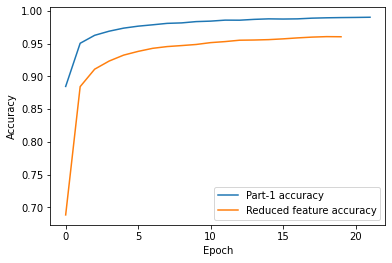

In [13]:
plt.plot(history_XN.history['accuracy'], label='Part-1 accuracy')
plt.plot(history_MLPenc.history['accuracy'], label = 'Reduced feature accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')